# Conditional probabilities

In practically all real world problem one is interested in finding (estimating) conditional probabilities/distributions. 

Examples: 
Conditional of being a long-time smoker, what is the probability of dying before the age of 60?  \
Conditional of being sunny today, what is the probability of rain for tomorrow? \
Conditional of having obtained university degree XYZ, what is the expected income within the first 5 years? 

# Example: Time series forecasting

For $ t=1,\dots, 100$ assume that your time series is generated by 
$$
y_t = 0.9 y_{t-1} + \epsilon_t, \quad \epsilon_{t} \sim N(0, 1) ,
$$
with $y_0 \sim N(0, \frac{1}{1 - 0.9**2})$

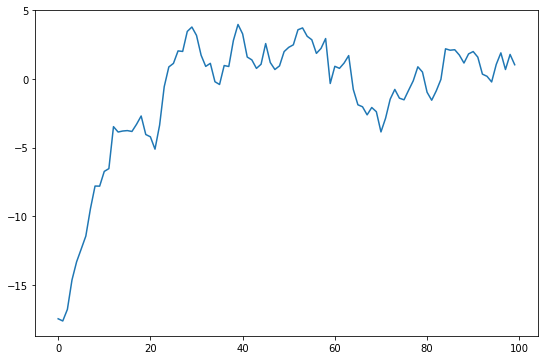

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9,6)

def generate_ts_data(T=100, size=100, seed=10):
    np.random.seed(seed)
    theta = 0.9
    y = np.random.normal(0, 1 / (1 - theta), size=size).reshape(-1, 1)
    for t in range(T):
        y[t] = theta * y[t-1] + np.random.standard_normal(1)
        
    return y
                
y = generate_ts_data()

fig, ax = plt.subplots()
ax.plot(y)

Text(0.5, 1.0, 'mean: -1.16, variance:21.85')

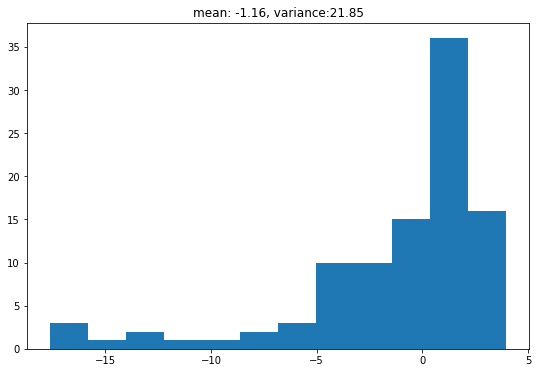

In [22]:
fig, ax = plt.subplots()
ax.hist(y, bins="auto")
ax.set_title(f"mean: {round(np.mean(y), 2)}, variance:{round(np.var(y), 2)}")

## Assume that you observed $y_1, \dots, y_T$. What is the "best" prediction for a new value of your time series ($y_{T+1}$)? 

Would you use the (empirical) marginal distribution $\hat{F}(Y)$ or the conditional distribution $\hat{F}(Y | Y_{t-1} = y_{t-1})$?

## Example: Regression 

Assume for $i = 1, \dots, 100$ that a dataset is generated by 
$$
y_{i} = 2 x_{i} + \epsilon_i,  \quad \epsilon \sim N(0, 1), \ x_i\sim N(0, 10)
$$

(array([ 7.,  4.,  9., 17., 26., 16., 10.,  8.,  1.,  2.]),
 array([-13.36494974, -10.27353647,  -7.18212321,  -4.09070995,
         -0.99929668,   2.09211658,   5.18352985,   8.27494311,
         11.36635637,  14.45776964,  17.5491829 ]),
 <BarContainer object of 10 artists>)

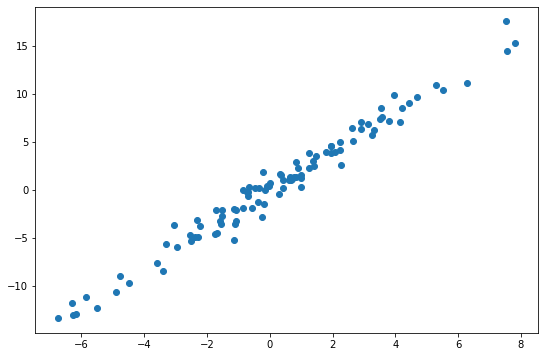

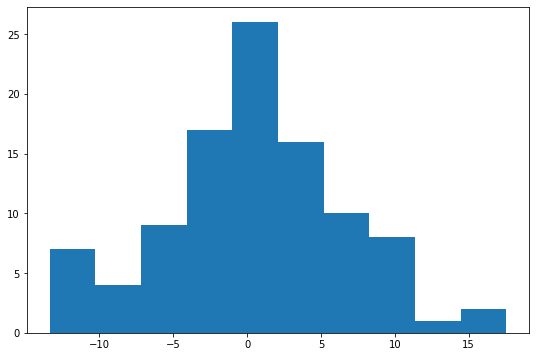

In [27]:
def generate_reg_data(N=100, size=100, seed=10):
    np.random.seed(seed)
    x = np.random.normal(0, 10 ** 0.5, size=[size, 1])
    y = 2 * x + np.random.standard_normal(size=[size, 1])
        
    return y, x


y, x = generate_reg_data()

fig, ax = plt.subplots()
ax.scatter(x, y)


fig, ax = plt.subplots()
ax.hist(y)

## Assume that you observed a new value for x, what is a "good" prediction of y?